In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import re
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi']= 300

In [14]:
qc_file_dir = r'C:\Users\libin\UCSF\MECP2\ATAC\dup_qc'

qc_file_dir = Path(qc_file_dir)
qc_files = qc_file_dir.glob('**/*.qc')
file_path_list = [str(path) for path in qc_files]
# print(file_path_list)

In [15]:
df_list = []
for file in file_path_list:
    file_name = file.split("\\")[-1]
    basename = "".join(re.findall(r'(.+)_R1.trim.trim.dup.qc', file_name))
    print(basename)
    qc_df = pd.read_csv(file, skiprows=6, nrows=1, sep="\t")
    qc_df.at[0,"LIBRARY"] = basename
    #print (qc_df.head())
    df_list.append(qc_df)

IJ005
IJ006
IJ007
IJ015
IJ016
IJ017
LM034
LM035
LM059
LM061
LM062
LM063
LM064
LM084
LM085
LM086
LM101
LM107
LM109
LM110
LM111
LM112
LM113
LM114
LM115
LM116
LM117
LMA036
LMA037
LMA038
LMA039
LMA040
LMA041
LMA042
LMA043


In [16]:
qc_df_all = pd.concat(df_list, axis=0)

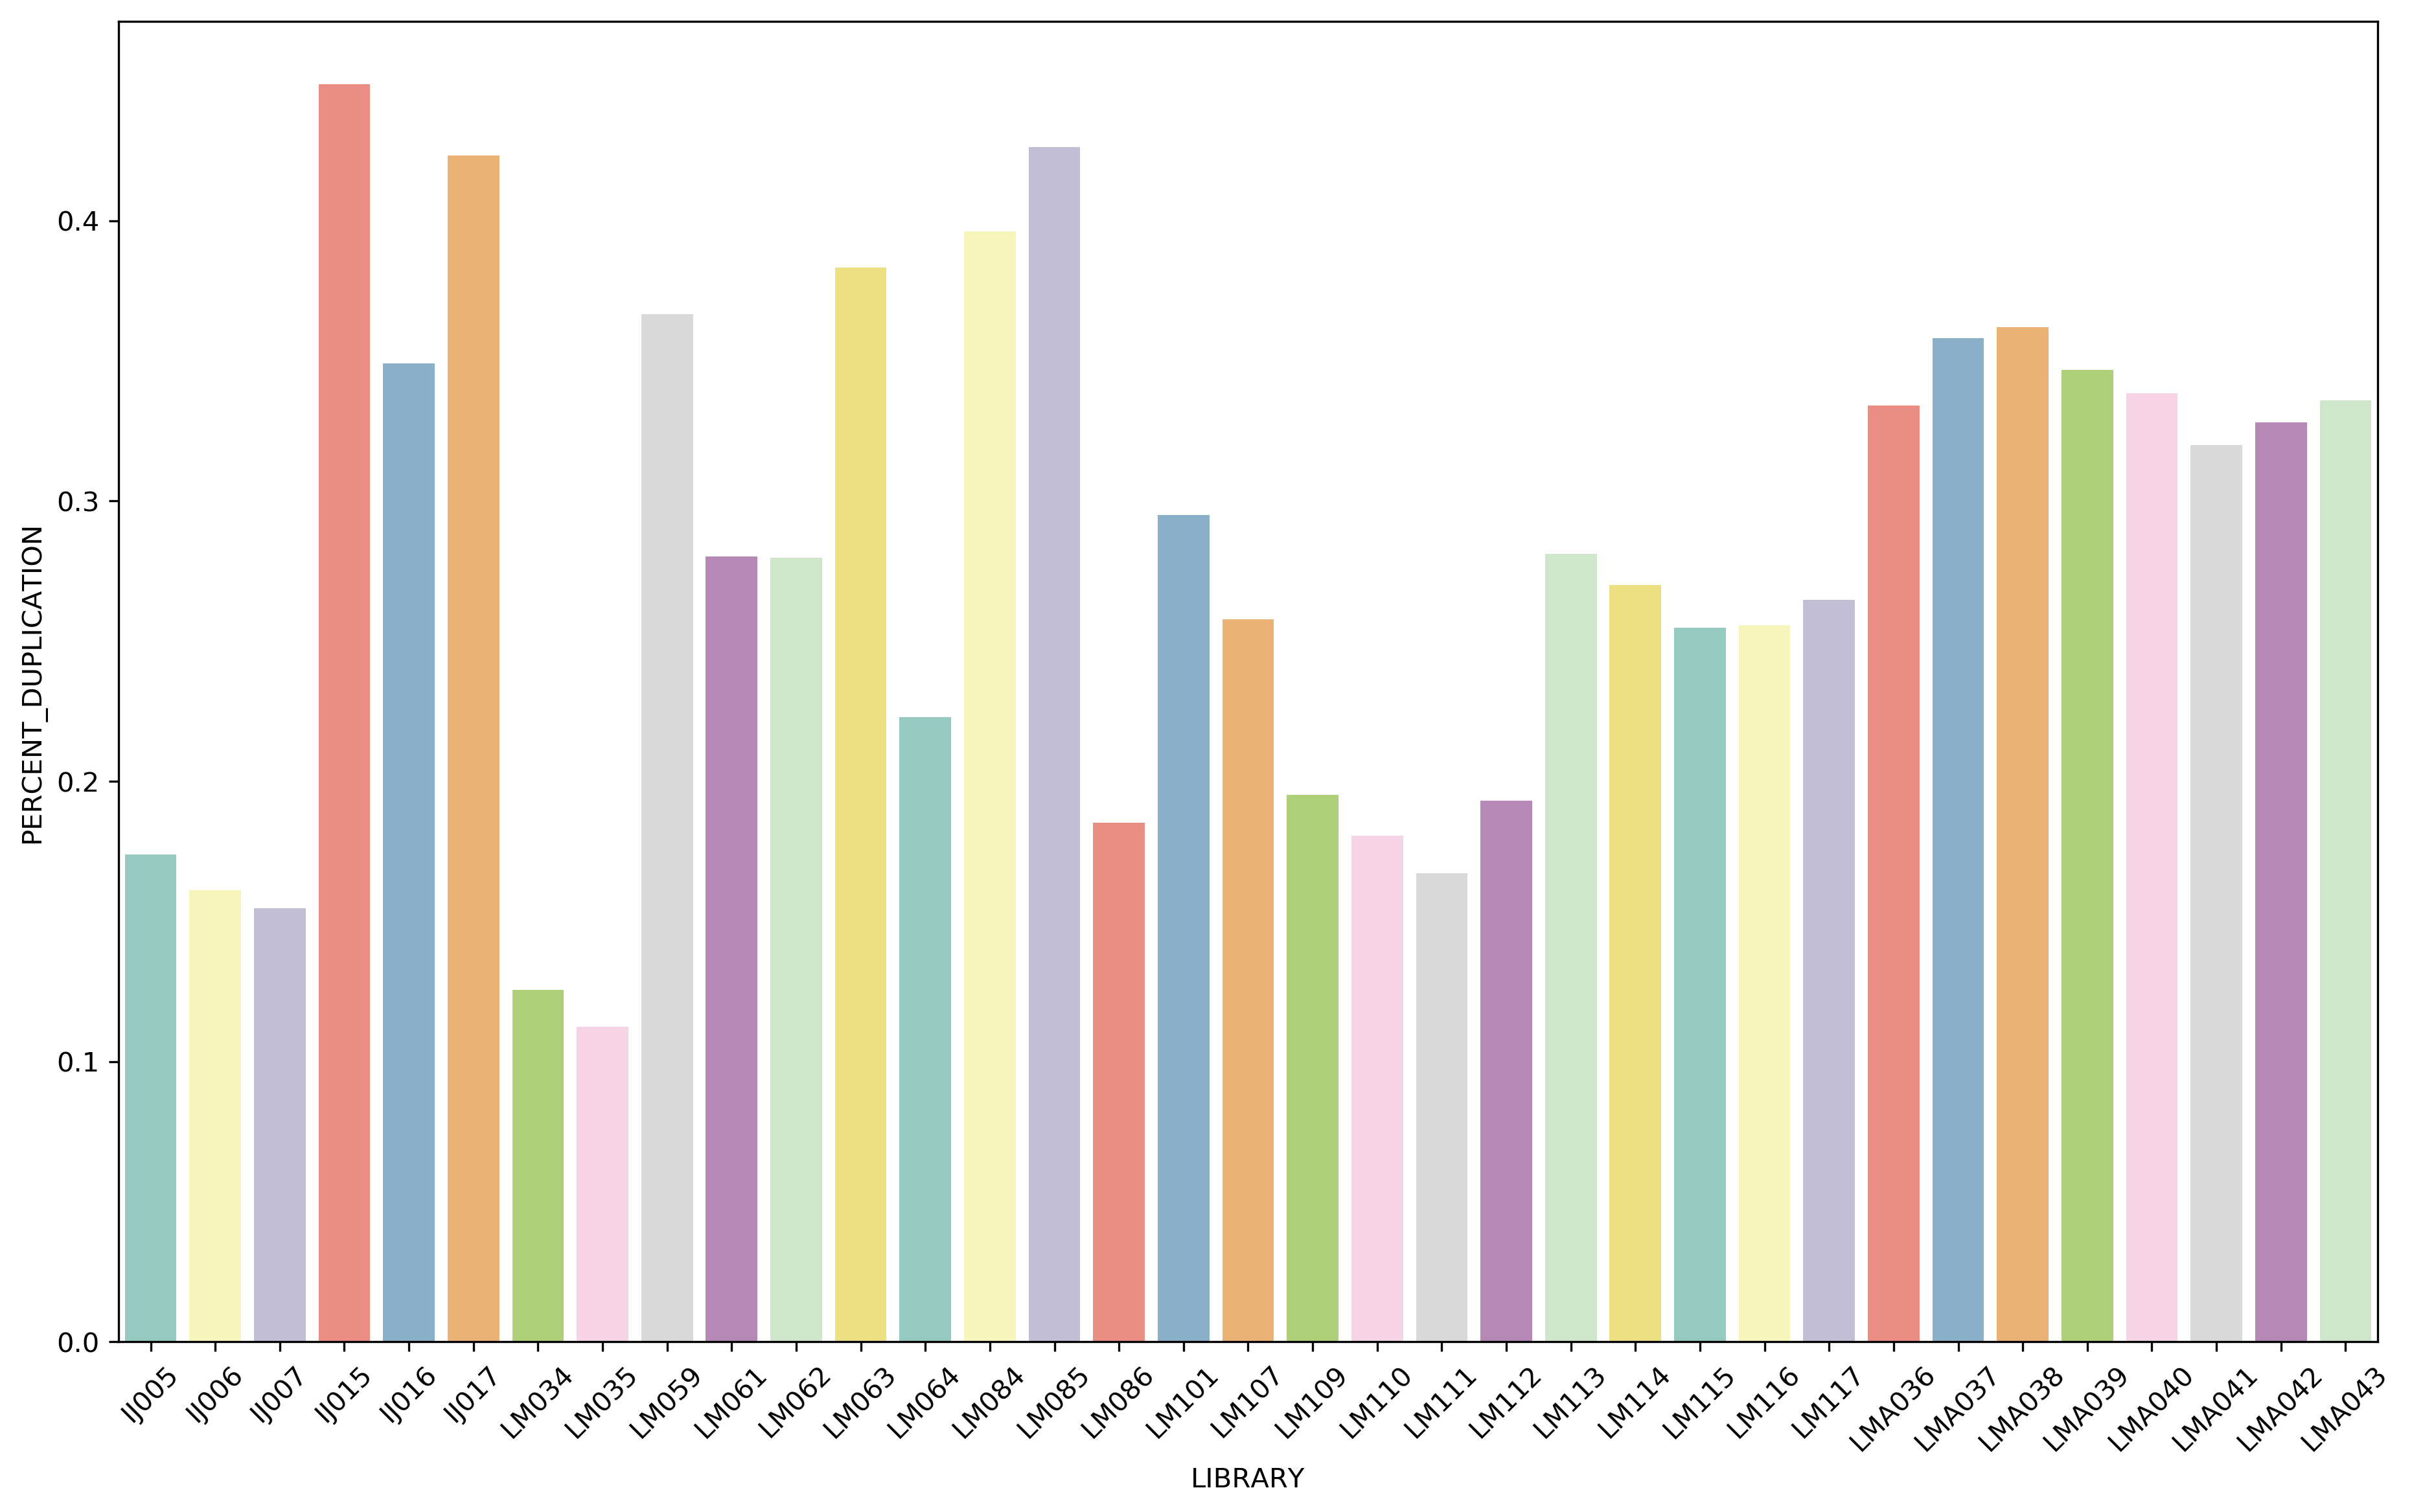

In [19]:
plt.figure(figsize=(15,9))
sns.barplot(x=qc_df_all["LIBRARY"], y=qc_df_all["PERCENT_DUPLICATION"], palette="Set3")
plt.xticks(rotation=45)
plt.savefig(r'C:\Users\libin\UCSF\MECP2\ATAC\dup_qc\ATAC_dup_qc.pdf', transparent=True)   

In [16]:
insert_file_dir = r'C:\Users\libin\UCSF\MECP2\ChIP\insertSize'

insert_file_dir = Path(insert_file_dir)
insert_files = insert_file_dir.glob('**/*.txt')
insert_file_path_list = [str(path) for path in insert_files]
# print(insert_file_path_list)

In [17]:
df_list_1 = []
for file in insert_file_path_list:
    file_name = file.split("\\")[-1]
    basename = "".join(re.findall(r'(.+).insert_size_metrics.txt', file_name))
    # print(basename)
    insert_df = pd.read_csv(file, skiprows=6, nrows=1, sep="\t")
    insert_df["LIBRARY"] = basename
    #print (qc_df.head())
    df_list_1.append(insert_df)

In [18]:
insert_df_all = pd.concat(df_list_1, axis=0)

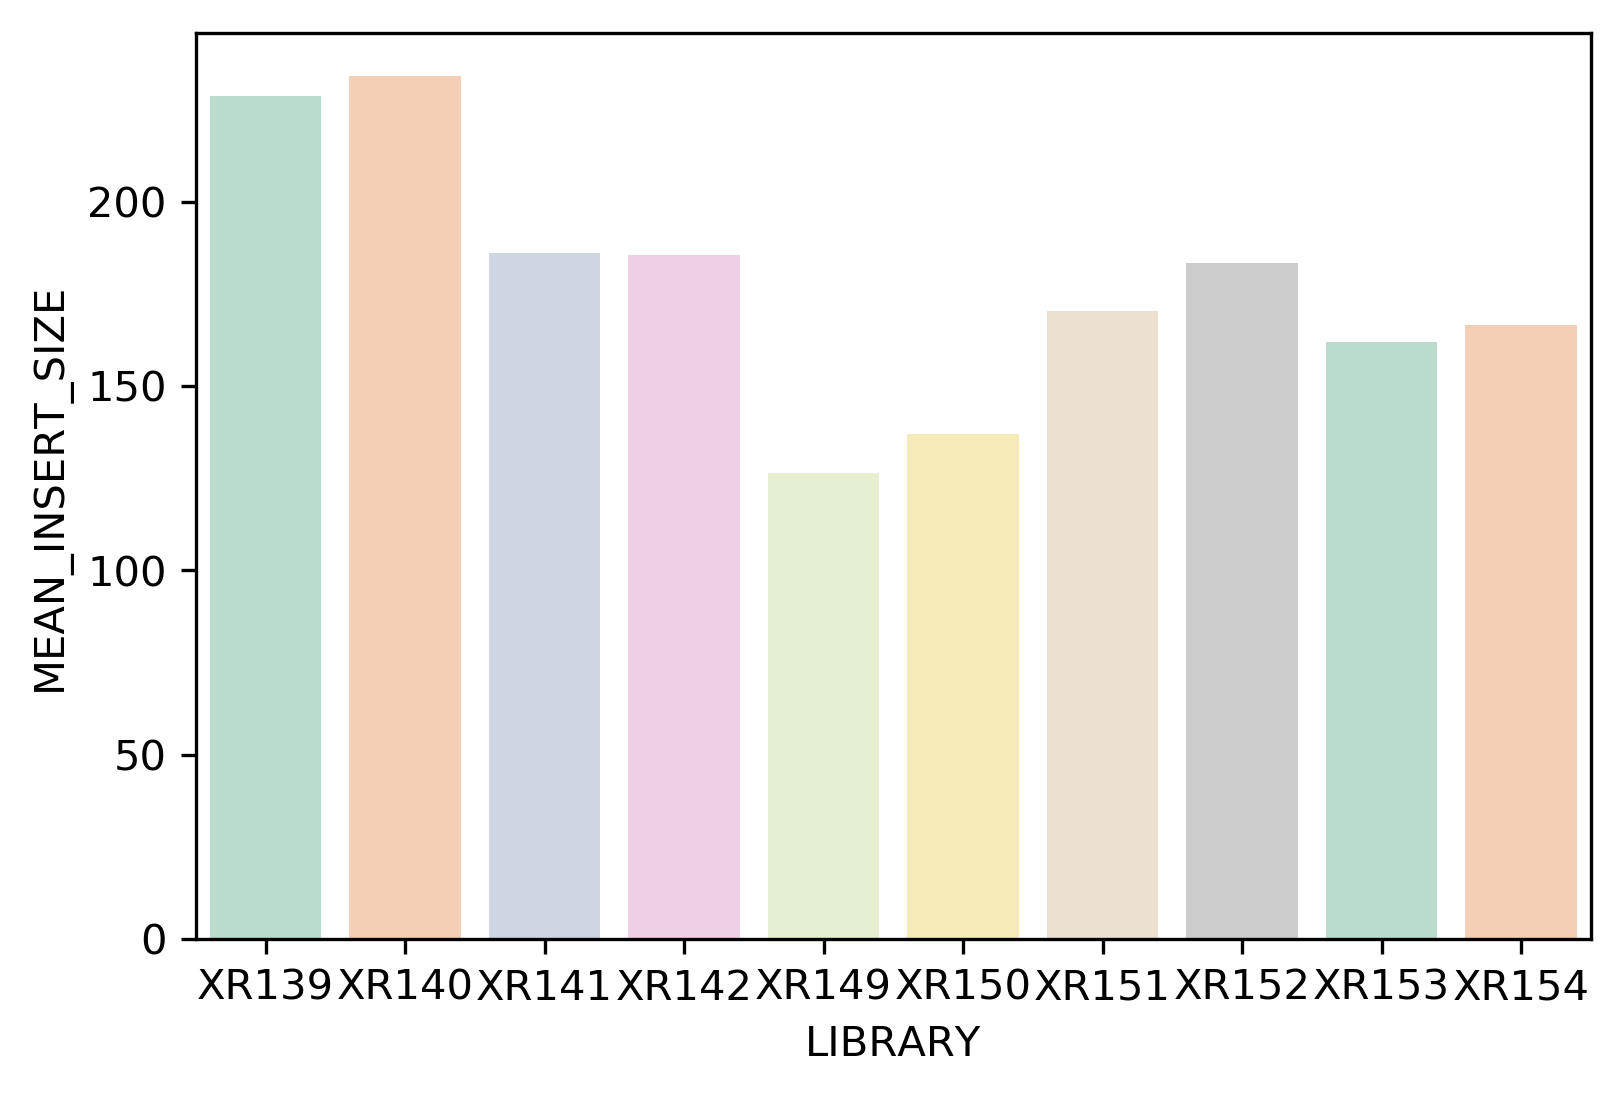

In [19]:
sns.barplot(x=insert_df_all["LIBRARY"], y=insert_df_all["MEAN_INSERT_SIZE"], palette="Pastel2")

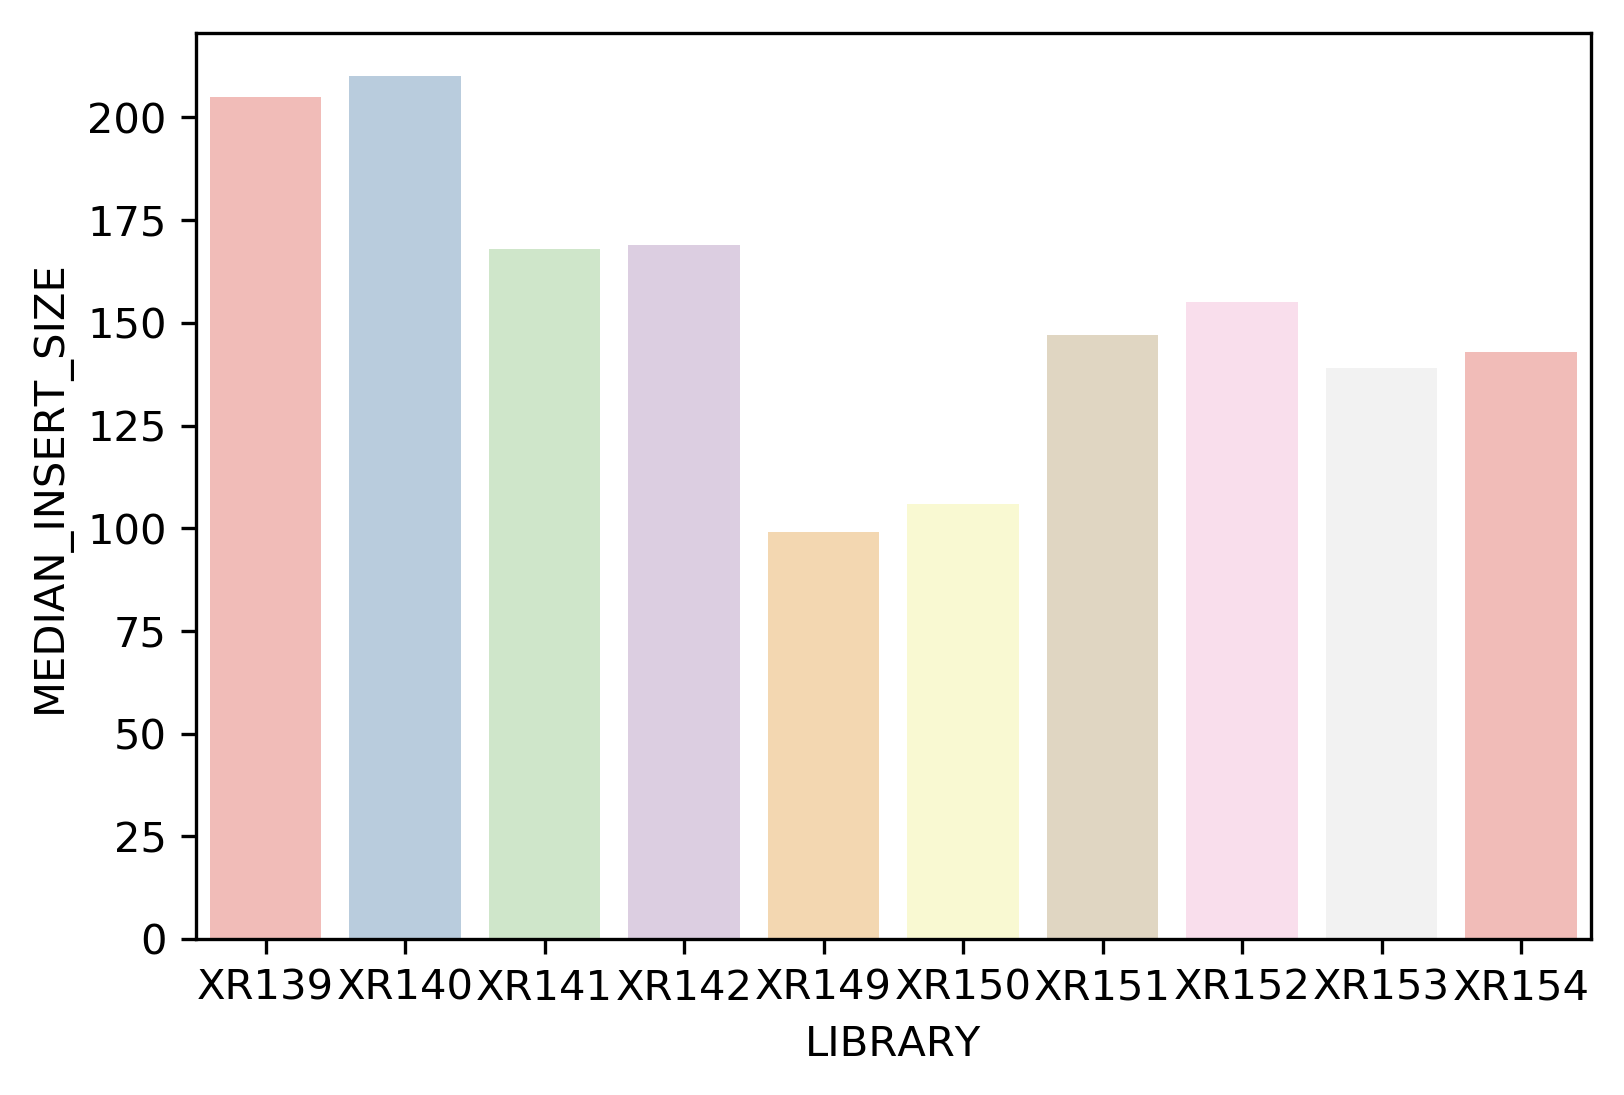

In [20]:
sns.barplot(x=insert_df_all["LIBRARY"], y=insert_df_all["MEDIAN_INSERT_SIZE"], palette="Pastel1")